"""
  This script reproduces Figure 4 in [1] Rubbens, Anne, and Taylor, Adrien B. "One-point extensions of function and operator classes."

  Given (x1,f1,g1)=([-1,0]',[-1 0]',1/2), (x2,f2,g2)=([1,0]',[1 0]',1/2), x3=[0 1]', g3=[0 h3]' and Lx=Ly=1, it plots the allowed region
  for f3 as a function of g3^(2), according to 
  p_{0,L}, satisfied at {(x_i,f_i,g_i),(x_j,f_j,g_j)} if and only if:
      f_j>=f_i+<g_i,x_j-x_i>+1/2/Lx ||g_i^(1)-g_j^(1)||^2 and f_j>=f_i+<g_i,x_j-x_i>+1/2/Ly ||g_i^(2)-g_j^(2)||^2.
  and to tilde{p}_{0,L}, satisfied at {(x_i,f_i,g_i),(x_j,f_j,g_j),(x_k,f_k,g_k)} if and only if:
      0>=max_{0<=alpha<=1}(1-alpha)(-f_i+f_j+<g_j,x_i-x_j>+1/2/Lx ||g_i^(1)-g_j^(1)||^2) 
           + alpha (-f_i+f_k+<g_k,x_i-x_k>+1/2/Lx ||g_i^(1)-g_k^(1)||^2)
           +alpha(1-alpha)^2(1/2/Ly||g_j^(2)-g_k^(2)||^2-1/2/Lx||g_j^(1)-g_k^(1)||^2), (1) and
      0>=max_{0<=alpha<=1}(1-alpha)(-f_i+f_j+<g_j,x_i-x_j>+1/2/Lx ||g_i^(2)-g_j^(2)||^2) 
           + alpha (-f_i+f_k+<g_k,x_i-x_k>+1/2/Lx ||g_i^(2)-g_k^(2)||^2)
           +alpha(1-alpha)^2(1/2/Lx||g_j^(1)-g_k^(1)||^2-1/2/Ly||g_j^(2)-g_k^(2)||^2). (2) 

"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [5]:
#For the sake of simplicity, xi=[xi,yi] and gi=[gi,hi].

def fmin_h(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha):
    """
    Computation of the condition (2) in tilde{p}_{O,L}: i=3, j=2,k=1: lower bound on f3 to be maximized
    """
    y = -(alpha * (f1 + g1 * (x3 - x1) + h1 * (y3 - y1) + 1/2/Ly * (h1 - h3)**2) 
          + (1 - alpha) * (f2 + g2 * (x3 - x2) + h2 * (y3 - y2) + 1/2/Ly * (h2 - h3)**2) 
          + alpha * (1 - alpha)**2 * (1/2/Lx * (g1 - g2)**2 - 1/2/Ly * (h1 - h2)**2))
    return y

def fmin_g(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha):
    """
    Computation of the condition (1) in tilde{p}_{O,L}: i=3, j=2,k=1: lower bound on f3 to be maximized
    """
    y = -(alpha * (f1 + g1 * (x3 - x1) + h1 * (y3 - y1) + 1/2/Lx * (g1 - g3)**2) 
          + (1 - alpha) * (f2 + g2 * (x3 - x2) + h2 * (y3 - y2) + 1/2/Lx * (g2 - g3)**2) 
          + alpha * (1 - alpha)**2 * (1/2/Lx * (h1 - h2)**2 - 1/2/Ly * (g1 - g2)**2))
    return y

def fmax_h(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha):
    """
    Computation of the condition (2) in tilde{p}_{O,L}: i=1, j=3,k=2: upper bound on f3 to be minimized
    """
    y = f1 - g3 * (x1 - x3) - h3 * (y1 - y3) - 1/2/Ly * (h3 - h1)**2 + (1 - alpha) / alpha * (f1 - f2 - g2 * (x1 - x2) - 1/2/Ly * (h1 - h2)**2) - (1 - alpha)**2 * (1/2/Lx * (g3 - g2)**2 - 1/2/Ly * (h3 - h2)**2)
    return y

def fmax_g(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha):
    """
    Computation of the condition (1) in tilde{p}_{O,L}: i=1, j=3,k=2: upper bound on f3 to be minimized
    """
    y = f1 - g3 * (x1 - x3) - h3 * (y1 - y3) - 1/2/Lx * (g3 - g1)**2 + (1 - alpha) / alpha * (f1 - f2 - g2 * (x1 - x2) - 1/2 * (g1 - g2)**2) + (1 - alpha)**2 * (1/2/Lx * (g3 - g2)**2 - 1/2/Ly * (h3 - h2)**2)
    return y

In [6]:
# Function to compute the extremal value for f3
#For the sake of simplicity, xi=[xi,yi] and gi=[gi,hi].
def extremal_val_blockwise(x1,y1,g1,h1,f1,x2,y2,g2,h2,f2,x3,y3,g3,h3,Lx,Ly,constr,objective):
    """
    This function computes the extremal value for f3 such that
    {(x1, f1, g1), (x2, f2, g2), (x3, f3, g3)} satisfies p_{0,L} or tilde{p}_{0,L}.
    
    Arguments:
        -x1,y1,g1,h1,f1,x2,y2,g2,h2,f2,x3,y3,g3,h3: Dataset values with respect to which 32 has to satisfy p_{0,L} or tilde{p}_{0,L}.
        -Lx, Ly: Parameters of p_{0,L} or tilde{p}_{0,L}.
        -constr: If constr >= 0, it ensures the set satisfies p_{0,L}. Otherwise, it ensures the set satisfies tilde{p}_{0,L}.
        -objective: If objective >= 0, extremal_val_blockwise computes the minimal value for f3. Else, it computes its maximal value.
    
    Returns:
        -f3: Extremal value for f3.
    """
    options = {'disp': False, 'maxiter': 10000, 'gtol': 1e-6}
    
    # Computation of the last conditions in tilde{p}_{0,L}
    # (2), i=3, j=2, k=1
    alpha = 1 / 10
    fun = lambda alpha: fmin_h(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha)
    res = minimize(fun, alpha, bounds=[(0, 1)], options=options)
    fmin = -res.fun

    # (1), i=3, j=2, k=1
    fun = lambda alpha: fmin_g(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha)
    res = minimize(fun, alpha, bounds=[(0, 1)], options=options)
    fmin = max(fmin,-res.fun)

    # (2), i=1, j=3, k=2
    fun = lambda alpha: fmax_h(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha)
    res = minimize(fun, alpha, bounds=[(0, 1)], options=options)
    fmax = res.fun

    # (1), i=1, j=3, k=2
    fun = lambda alpha: fmax_g(x1, y1, g1, h1, f1, x2, y2, g2, h2, f2, x3, y3, g3, h3, Lx, Ly, alpha)
    res = minimize(fun, alpha, bounds=[(0, 1)], options=options)
    fmax = min(fmax,res.fun)

    # (2), i=2, j=3, k=1
    fun = lambda alpha: fmax_h(x2, y2, g2, h2, f2, x1, y1, g1, h1, f1, x3, y3, g3, h3, Lx, Ly, alpha)
    res = minimize(fun, alpha, bounds=[(0, 1)], options=options)
    fmax = min(fmax,res.fun)

    # (1), i=2, j=3, k=1
    fun = lambda alpha: fmax_g(x2, y2, g2, h2, f2, x1, y1, g1, h1, f1, x3, y3, g3, h3, Lx, Ly, alpha)
    res = minimize(fun, alpha, bounds=[(0, 1)], options=options)
    fmax = min(fmax,res.fun)
    
    # Ensuring that {((x1, f1, g1), (x2, f2, g2),(x3,f3,g3)} satisfies p_{0,L} by bounding f3.
    bound_min = max(f1 + g1 * (x3 - x1) + h1 * (y3 - y1) + 0.5 * (g1 - g3) ** 2,
                    f2 + g2 * (x3 - x2) + h2 * (y3 - y2) + 0.5 * (g2 - g3) ** 2,
                    f1 + g1 * (x3 - x1) + h1 * (y3 - y1) + 0.5 * (h1 - h3) ** 2,
                    f2 + g2 * (x3 - x2) + h2 * (y3 - y2) + 0.5 * (h2 - h3) ** 2)
    bound_max = min(f1 + g3 * (x3 - x1) + h3 * (y3 - y1) - 0.5 * (g1 - g3) ** 2,
                    f1 + g3 * (x3 - x1) + h3 * (y3 - y1) - 0.5 * (h1 - h3) ** 2,
                    f2 + g3 * (x3 - x2) + h3 * (y3 - y2) - 0.5 * (g2 - g3) ** 2,
                    f2 + g3 * (x3 - x2) + h3 * (y3 - y2) - 0.5 * (h2 - h3) ** 2)
    if constr <= 0:
        bound_min = max(fmin, bound_min)        
        bound_max = min(fmax,bound_max)
        
    bounds=[(bound_min,bound_max)]
    
    # Initial value for f3
    f3_0 = 1
    # Minimization or maximization of f3
    def fun_obj(f3):
        return f3*objective

    res = minimize(fun_obj, f3_0, bounds=bounds, options=options)
    
    return res.x[0]   


In [7]:
# Dataset and parameters
#For the sake of simplicity, xi=[xi,yi] and gi=[gi,hi].
f1 = 1 / 2
f2 = 1 / 2
x1 = -1
x2 = 1
g1 = -1
g2 = 1
y1 = 0
y2 = 0
h1 = 0
h2 = 0
x3 = 0
y3 = 1
g3 = 0
Lx = 1
Ly = 1

# Interval of values for h3
N = 100
H3 = np.linspace(0,1,N)

# Initialize arrays for f3_min and f3_max
f3_min = np.zeros((2, N))
f3_max = np.zeros((2, N))

# Compute the extremal values for f3 as a function of g3
for i in range(N):
    f3_min[0, i] = extremal_val_blockwise(x1,y1,g1,h1,f1,x2,y2,g2,h2,f2,x3,y3,g3,H3[i],Lx,Ly,1,1)
    f3_max[0, i] = extremal_val_blockwise(x1,y1,g1,h1,f1,x2,y2,g2,h2,f2,x3,y3,g3,H3[i],Lx,Ly,1,-1)
    f3_min[1, i] = extremal_val_blockwise(x1,y1,g1,h1,f1,x2,y2,g2,h2,f2,x3,y3,g3,H3[i],Lx,Ly,-1,1)
    f3_max[1, i] = extremal_val_blockwise(x1,y1,g1,h1,f1,x2,y2,g2,h2,f2,x3,y3,g3,H3[i],Lx,Ly,-1,-1)

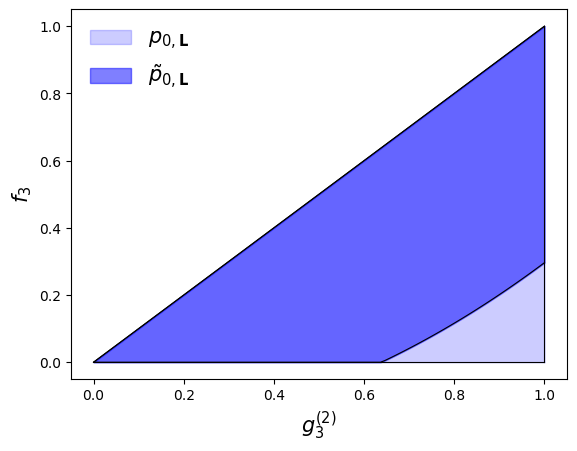

In [8]:
# Plot the result
plt.fill_between(H3, f3_min[0, :], f3_max[0, :], color='blue', alpha=0.2, label=r'$p_{0,\mathbf{L}}$')
plt.fill_between(H3, f3_min[1, :], f3_max[1, :], color='blue', alpha=0.5, label=r'$\tilde{p}_{0,\mathbf{L}}$')
plt.plot(H3, f3_min[0,:], color='black', linewidth=0.8)  
plt.plot(H3, f3_max[0,:], color='black', linewidth=0.8)
plt.plot(H3, f3_min[1,:], color='black', linewidth=0.8)  
plt.plot(H3, f3_max[1,:], color='black', linewidth=0.8)
plt.plot([1,1],[0,1],color='black', linewidth=0.8)
# Adding labels and formatting
plt.xlabel(r'$g_3^{(2)}$', fontsize=15)
plt.ylabel(r'$f_3$', fontsize=15)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(fontsize=15, loc='upper left', frameon=False)
plt.show()